In [6]:
import pandas as pd 
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [7]:
# Load the 'kesalahan' column from the Banduan_v2 file
banduan_v2_path = r'C:\Users\DataMicron\Desktop\Work\Penjara\Dataset\Banduan_v2.xlsx'
banduan_v2_df = pd.read_excel(banduan_v2_path)
banduan_v2_df.head()

,tarikh_masuk,id_banduan,jantina,negeri,umur,bangsa,kategori_hukuman,banduan_berulang_kali,kesalahan,tempoh_hukuman,penyakit,rawatan,program_pemulihan,id_penjara,status,tarikh_status
0,2020-01-26,PK718,Perempuan,Selangor,57,India,Seumur Hidup,Tidak,Pengedar Dadah,5,Skizofrenia,NaN,PPI 1,PSG,NaN,NaT
1,2022-12-25,PSG768,Perempuan,Penang,39,Lain-lain,Banduan Akhir,Tidak,Jenayah Bunuh,14,Skizofrenia,NaN,Kesedaran dan Pemulihan,PSG,NaN,NaT
2,2020-11-10,PK824,Lelaki,Johor,51,India,Seumur Hayat,Tidak,Pencurian,1,NaN,Terapi Fizikal,PPI 2,PK,NaN,NaT
3,2021-01-06,PK559,Lelaki,Johor,59,India,Hukuman Singkat,Tidak,Pencurian,5,NaN,NaN,Kesedaran dan Pemulihan,PSG,Meninggal,2023-01-06
4,2021-10-05,PSG155,Lelaki,Pahang,54,Lain-lain,Orang Diparol,Tidak,Jenayah Seksual,19,NaN,NaN,Parol,PK,NaN,NaT


In [8]:
# Extracting 'kesalahan' column
kesalahan_list = banduan_v2_df['kesalahan'].dropna().unique().tolist()

# Function to create random kesalahan pairs
def create_random_kesalahan_pair(kesalahan_list):
    return '-'.join(random.sample(kesalahan_list, 2))

# Generate 10,000 random 'History' data
history_data = [create_random_kesalahan_pair(kesalahan_list) for _ in range(10000)]

# Display the first few entries
history_data[:5]

['Jenayah Bunuh-Pengedar Dadah',
 'Pencurian-Jenayah Seksual',
 'Keganasan Rumah Tangga-Jenayah Bunuh',
 'Jenayah Seksual-Pengedar Dadah',
 'Keganasan Rumah Tangga-Jenayah Seksual']

In [12]:
# Load the V3_fight_predictions file
v3_fight_predictions_path = r'C:\Users\DataMicron\Desktop\Work\Penjara\Output\V3_fight_predictions.xlsx'
v3_fight_predictions_df = pd.read_excel(v3_fight_predictions_path)
v3_fight_predictions_df.head()

,Racial_Combination,Gang_Relation,Fights_History,History,Result
0,M-C,SG,F-NF,NaN,NaN
1,M-I,NG,F-F,NaN,NaN
2,M-M,G-NG,NF-NF,NaN,NaN
3,C-C,NG-NG,NaN,NaN,NaN
4,I-I,NaN,NaN,NaN,NaN


In [13]:
# Defining the categories for synthetic data generation
racial_combinations = ['m-c', 'm-i', 'm-m', 'c-c', 'i-i', 'i-c']
gang_relations = ['SG', 'NG', 'DG', 'G']
fights_history = ['f-f', 'nf-nf']
results = ['Fight', 'No Fight']

# Function to generate random data from a list of options
def generate_random_data(options, num_entries=10000):
    return [random.choice(options) for _ in range(num_entries)]

# Generating synthetic data for each column
synthetic_racial_combinations = generate_random_data(racial_combinations)
synthetic_gang_relations = generate_random_data(gang_relations)
synthetic_fights_history = generate_random_data(fights_history)
synthetic_results = generate_random_data(results)

# Creating a DataFrame with the synthetic data
synthetic_v3_df = pd.DataFrame({
    'Racial_Combination': synthetic_racial_combinations,
    'Gang_Relation': synthetic_gang_relations,
    'Fights_History': synthetic_fights_history,
    'History': history_data,  # The previously generated 'History' data
    'Result': synthetic_results
})

# Display the first few rows of the synthetic data
synthetic_v3_df.head()

,Racial_Combination,Gang_Relation,Fights_History,History,Result
0,i-c,DG,nf-nf,Jenayah Bunuh-Pengedar Dadah,No Fight
1,c-c,DG,f-f,Pencurian-Jenayah Seksual,Fight
2,i-c,DG,f-f,Keganasan Rumah Tangga-Jenayah Bunuh,No Fight
3,i-i,G,f-f,Jenayah Seksual-Pengedar Dadah,No Fight
4,i-c,SG,nf-nf,Keganasan Rumah Tangga-Jenayah Seksual,Fight


In [14]:
# Encoding categorical variables
le = LabelEncoder()
synthetic_v3_df_encoded = synthetic_v3_df.apply(le.fit_transform)

# Splitting the data into features (X) and target (y)
X = synthetic_v3_df_encoded.drop('Result', axis=1)
y = synthetic_v3_df_encoded['Result']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [15]:
accuracy, report


(0.486,
 '              precision    recall  f1-score   support\n\n           0       0.48      0.48      0.48       996\n           1       0.49      0.49      0.49      1004\n\n    accuracy                           0.49      2000\n   macro avg       0.49      0.49      0.49      2000\nweighted avg       0.49      0.49      0.49      2000\n')

In [ ]:
synthetic_v3_df.to_excel(r'V4_fight_prediction.xlsx', index=False)

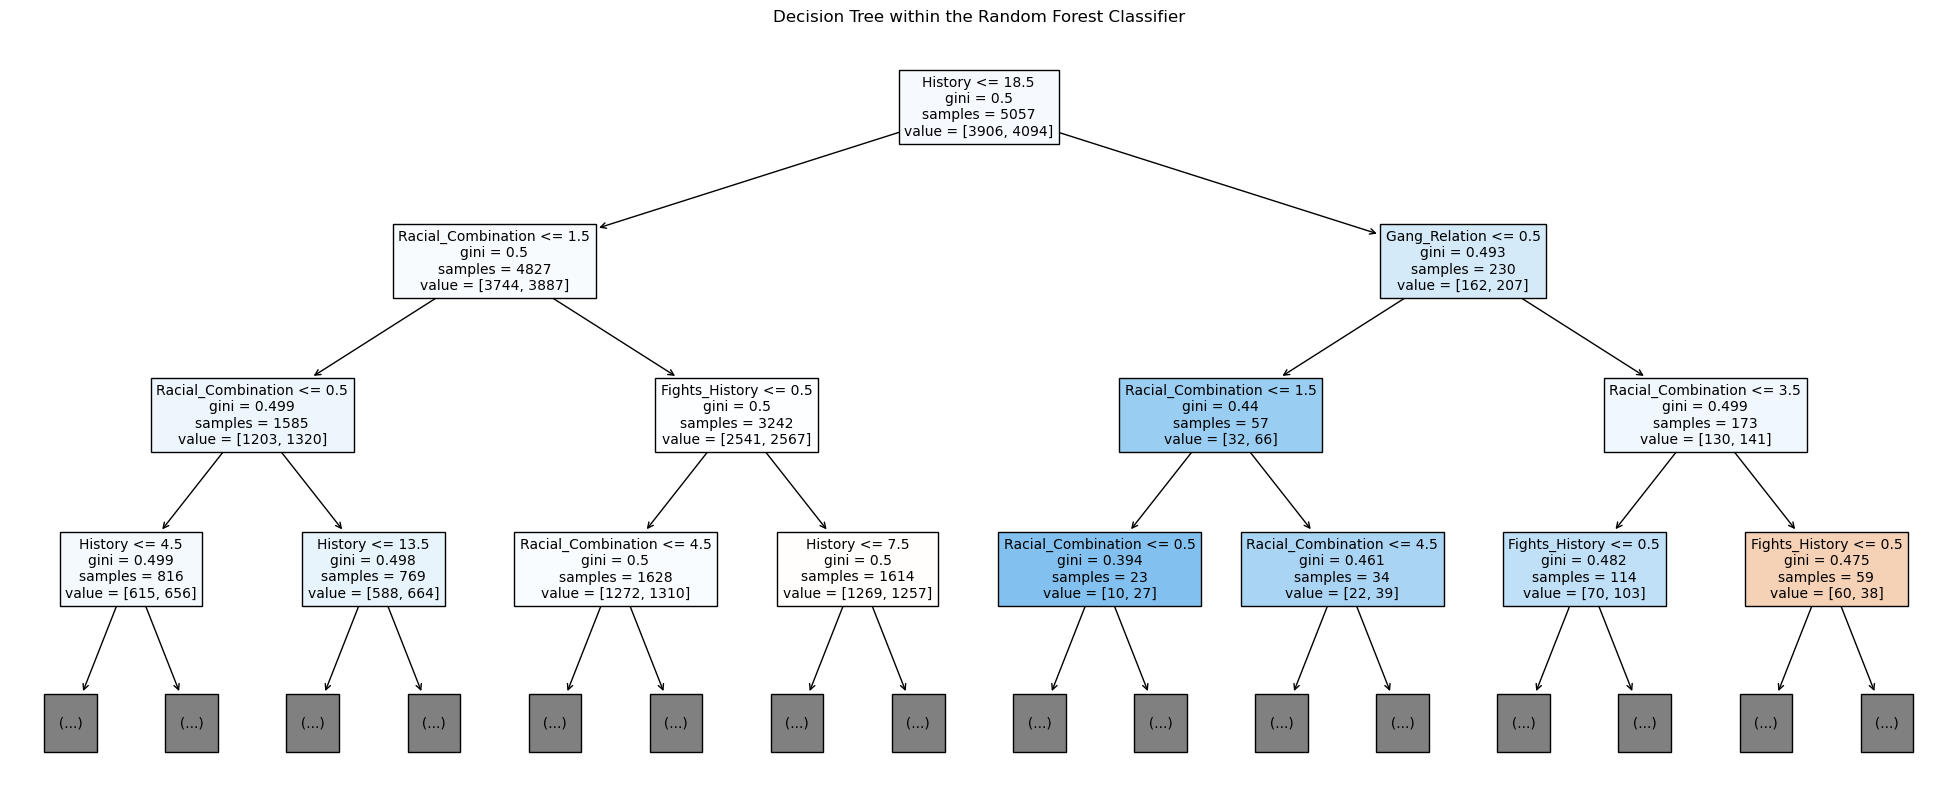

In [17]:
# Extract one tree from the Random Forest
tree_in_forest = rf_classifier.estimators_[0]

# Plotting the tree
plt.figure(figsize=(25, 10))  # You can adjust the size for better visibility
plot_tree(tree_in_forest, filled=True, feature_names=list(X.columns), max_depth=3, fontsize=10)
plt.title("Decision Tree within the Random Forest Classifier")
plt.savefig("decision_tree.png")
plt.show()

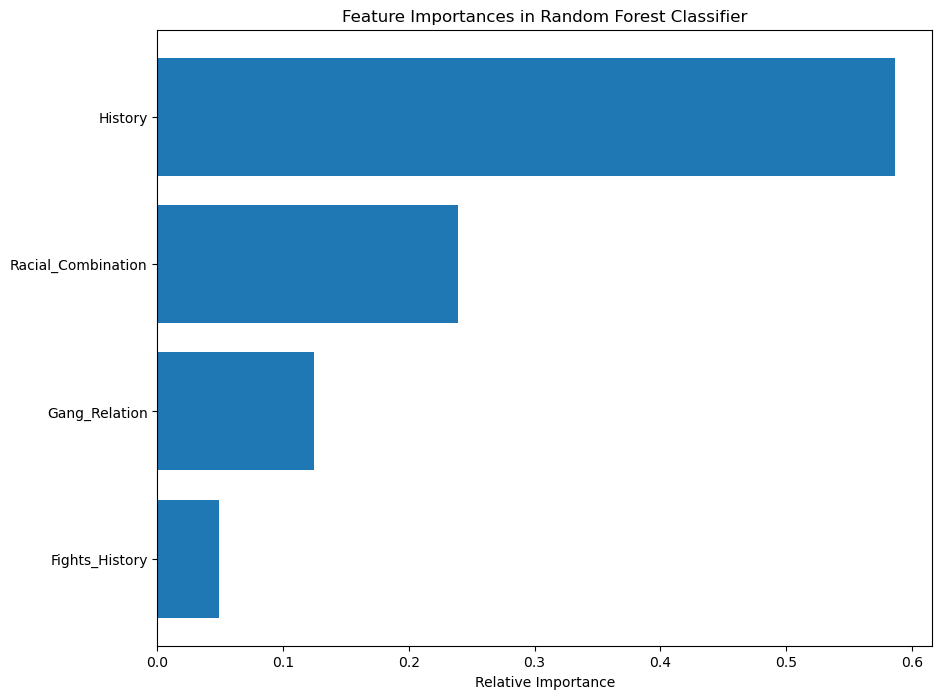

In [18]:
# Assuming you have a trained Random Forest model 'rf_classifier'
importances = rf_classifier.feature_importances_

# Sorting the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Creating a horizontal bar plot for feature importances
plt.figure(figsize=(10, 8))
plt.title('Feature Importances in Random Forest Classifier')
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), [X.columns[i] for i in sorted_indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()